In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import eigh 

In [9]:
densidad= 7850 #
A=10E-4
L_total =1
I=10E-8
E= 210E9
n_elementos=3
n_nodos=n_elementos+1
gl=2

In [10]:
MN=np.linspace(0,L_total,n_elementos+1).reshape(-1,1)
MN=np.hstack([MN, np.zeros_like(MN)])
MC = ([[0,1]])
for i in range(n_elementos-1):
    MC.append([MC[-1][1],MC[-1][1] +1])
MC = np.array(MC)

K = np.zeros((2*n_nodos,2*n_nodos))
C = np.zeros((2*n_nodos,2*n_nodos))
L=L_total/n_elementos
s=[0,1]
r=(np.linspace(2,2*n_nodos-1,2*n_nodos-2)).astype(int)

In [11]:
for e in range (len(MC)):
    a, b= MC[i] 
    a=int(a)
    b=int(b)
    x1, y1 = MN[a]
    x2, y2 = MN[b]

    
    K_local =  ((E*I)/L**3) * np.array(
            [(12,6*L,-12,6*L),
             (6*L,4*L**2,-6*L,2*L**2),
             (-12,-6*L,12,-6*L),
             (6*L,2*L**2, -6*L,4*L**2)])
    
    for i in MC[e]:
        columna_i = list(MC[e]).index(i) # identifico en que columna de MC esta el elemento i
        index_i = np.linspace(i*gl,(i+1)*gl-1,gl).astype(int)
        ind_col_i = np.linspace(columna_i*gl,(columna_i+1)*gl-1,gl).astype(int)
        for j in MC[e]:
            columna_j = list(MC[e]).index(j) # # identifico en que columna de MC esta el elemento i
            index_j = np.linspace(j*gl,(j+1)*gl-1,gl).astype(int)
            ind_col_j = np.linspace(columna_j*gl,(columna_j+1)*gl-1,gl).astype(int)
            K[np.ix_(index_i, index_j)] +=  K_local[np.ix_(ind_col_i , ind_col_j)]
        
    C_local = densidad*A*(L/24) * np.array(
                [(12,0,0,0),
                 (0,L**2,0,0),
                 (0,0,12,0),
                 (0,0,0,L**2)])

    for i in MC[e]:
        columna_i = list(MC[e]).index(i) # identifico en que columna de MC esta el elemento i
        index_i = np.linspace(i*gl,(i+1)*gl-1,gl).astype(int)
        ind_col_i = np.linspace(columna_i*gl,(columna_i+1)*gl-1,gl).astype(int)
        for j in MC[e]:
            columna_j = list(MC[e]).index(j) # # identifico en que columna de MC esta el elemento i
            index_j = np.linspace(j*gl,(j+1)*gl-1,gl).astype(int)
            ind_col_j = np.linspace(columna_j*gl,(columna_j+1)*gl-1,gl).astype(int)
            C[np.ix_(index_i, index_j)] +=  C_local[np.ix_(ind_col_i , ind_col_j)]



In [12]:
w, vl_r = eigh(K[np.ix_(r,r)], C[np.ix_(r,r)])
print(vl_r)

[[ 0.1078782   0.32978952 -0.44635954  0.23469896  0.06939118 -0.05129516]
 [ 0.59378168  1.13877527  0.10705238 -3.45014763  5.12059322 -1.2202646 ]
 [ 0.36148961  0.3421096   0.26434642 -0.10119412 -0.21382409 -0.09280017]
 [ 0.88156788 -1.30291596  2.04871432  3.90822572  1.82482791 -3.99970973]
 [ 0.67109076 -0.42334539 -0.14405979  0.04403293  0.12318331  0.31125687]
 [ 0.9537416  -2.90348891 -3.70944928 -3.72463733 -3.30034417 -5.88920122]]


In [38]:
vl=np.vstack([np.zeros((2,2*(n_nodos-1))),vl_r])
frecuencia=np.sqrt(w)/(2*np.pi)
vl_normalizado=vl/max(vl[2*n_nodos-2,:]
print(vl_normalizado)

[[  0.          -0.          -0.           0.           0.
    0.        ]
 [  0.          -0.          -0.           0.           0.
    0.        ]
 [  0.16075054  -0.77900818   3.09843243   5.33007887   0.56331641
   -0.1648001 ]
 [  0.88480086  -2.68994372  -0.74311074 -78.35381374  41.56888739
   -3.92044236]
 [  0.53865979  -0.80810989  -1.83497709  -2.29814666  -1.73582027
   -0.29814659]
 [  1.31363436   3.07766659 -14.22127759  88.75689478  14.81392144
  -12.85018959]
 [  1.           1.           1.           1.           1.
    1.        ]
 [  1.42118125   6.85843991  25.74937235 -84.58755117 -26.79213695
  -18.92071111]]


Los desplazamientos son las posiciones impares de cada fila (las posiciones pares son angulos).

In [39]:
# matriz_desplazamientos = vl_normalizado[:, 0::2]
matriz_desplazamientos = vl_normalizado[::2]
print(vl_normalizado)
print('')
print(matriz_desplazamientos)


[[  0.          -0.          -0.           0.           0.
    0.        ]
 [  0.          -0.          -0.           0.           0.
    0.        ]
 [  0.16075054  -0.77900818   3.09843243   5.33007887   0.56331641
   -0.1648001 ]
 [  0.88480086  -2.68994372  -0.74311074 -78.35381374  41.56888739
   -3.92044236]
 [  0.53865979  -0.80810989  -1.83497709  -2.29814666  -1.73582027
   -0.29814659]
 [  1.31363436   3.07766659 -14.22127759  88.75689478  14.81392144
  -12.85018959]
 [  1.           1.           1.           1.           1.
    1.        ]
 [  1.42118125   6.85843991  25.74937235 -84.58755117 -26.79213695
  -18.92071111]]

[[ 0.         -0.         -0.          0.          0.          0.        ]
 [ 0.16075054 -0.77900818  3.09843243  5.33007887  0.56331641 -0.1648001 ]
 [ 0.53865979 -0.80810989 -1.83497709 -2.29814666 -1.73582027 -0.29814659]
 [ 1.          1.          1.          1.          1.          1.        ]]


Graficando desplazamientos en funcion de posicion: 



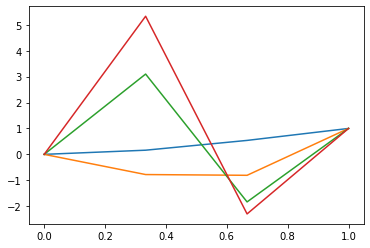

In [47]:
posicion = MN[:,0]

for i in range(0,n_elementos+1):
    desplazamientos = matriz_desplazamientos[:,i]
    plt.plot(posicion,desplazamientos)